In [9]:
# Imported Libraries
import yfinance as yf
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as stats 
import statsmodels.api as sm

First, we will need to get our stock data. I will be using NVIDIA (Ticker = "NVDA" in yfinance package) to highlight different kinds of systematic trading strategies.

[*********************100%%**********************]  1 of 1 completed
C:\Users\jonat\AppData\Local\Temp\ipykernel_20152\1465578570.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data.rename(columns={'Adj Close': 'NVDA_Close'}, inplace=True)
C:\Users\jonat\AppData\Local\Temp\ipykernel_20152\1465578570.py:8: FutureWarning: DataFrame.fillna with 'method' is deprecated and will raise in a future version. Use obj.ffill() or obj.bfill() instead.
  stock_data.fillna(method='ffill', inplace=True) # Forward Fill Missing Data Points
C:\Users\jonat\AppData\Local\Temp\ipykernel_20152\1465578570.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returni

            NVDA_Close
Date                  
2019-01-02    3.378323
2019-01-03    3.174215
2019-01-04    3.377579
2019-01-07    3.556391
2019-01-08    3.467852


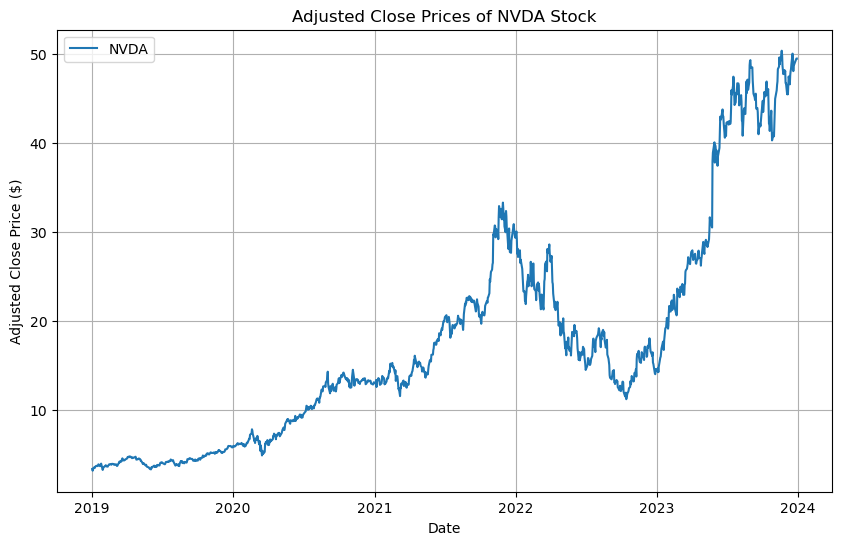

In [10]:
stock_data = yf.download('NVDA', start='2019-01-01', end='2024-01-01')

# Step 2: Clean NVDA Stock Data
stock_data = stock_data[['Adj Close']]  # Use adjusted close price
stock_data.rename(columns={'Adj Close': 'NVDA_Close'}, inplace=True)
stock_data

stock_data.fillna(method='ffill', inplace=True) # Forward Fill Missing Data Points

print(stock_data.head())

plt.figure(figsize=(10, 6))
plt.plot(stock_data, label='NVDA')

plt.title('Adjusted Close Prices of NVDA Stock')
plt.xlabel('Date')
plt.ylabel('Adjusted Close Price ($)')
plt.legend()
plt.grid(True)
plt.show()

# Momentum Strategies:

Momentum Strategies are a commonly used method by discretionary and systematic traders. It is also known as trend-following.  
One would have to first specify what forms an upward trend (How many days between 2 moving averages crossover). In this example, we would use the 20 day and 50 day moving averages. 
Specify what forms a significant trend via filtering and conditioning. In this example, we would establish a "buy" signal everytime the 20 day moving averages crosses the 50 day moving average and a "sell" signal everytime the 50 day moving average crosses the 20 day moving average. 


In [11]:
# Calculate moving averages
# 20-day SMA
stock_data['SMA_20'] = stock_data['NVDA_Close'].rolling(window=20).mean()

# 50-day SMA
stock_data['SMA_50'] = stock_data['NVDA_Close'].rolling(window=50).mean()

# Display the DataFrame with the moving averages
print(stock_data[['NVDA_Close', 'SMA_20', 'SMA_50']].head(60))  # Showing the first 60 rows

            NVDA_Close    SMA_20    SMA_50
Date                                      
2019-01-02    3.378323       NaN       NaN
2019-01-03    3.174215       NaN       NaN
2019-01-04    3.377579       NaN       NaN
2019-01-07    3.556391       NaN       NaN
2019-01-08    3.467852       NaN       NaN
2019-01-09    3.536054       NaN       NaN
2019-01-10    3.601775       NaN       NaN
2019-01-11    3.691057       NaN       NaN
2019-01-14    3.730985       NaN       NaN
2019-01-15    3.716849       NaN       NaN
2019-01-16    3.691304       NaN       NaN
2019-01-17    3.762730       NaN       NaN
2019-01-18    3.891941       NaN       NaN
2019-01-22    3.689569       NaN       NaN
2019-01-23    3.702465       NaN       NaN
2019-01-24    3.914509       NaN       NaN
2019-01-25    3.971798       NaN       NaN
2019-01-28    3.422715       NaN       NaN
2019-01-29    3.263745       NaN       NaN
2019-01-30    3.407340  3.597460       NaN
2019-01-31    3.565071  3.606797       NaN
2019-02-01 

C:\Users\jonat\AppData\Local\Temp\ipykernel_20152\2883040505.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['SMA_20'] = stock_data['NVDA_Close'].rolling(window=20).mean()
C:\Users\jonat\AppData\Local\Temp\ipykernel_20152\2883040505.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['SMA_50'] = stock_data['NVDA_Close'].rolling(window=50).mean()


C:\Users\jonat\AppData\Local\Temp\ipykernel_20152\3450567032.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['positions'] = np.where(stock_data['SMA_20'] > stock_data['SMA_50'],


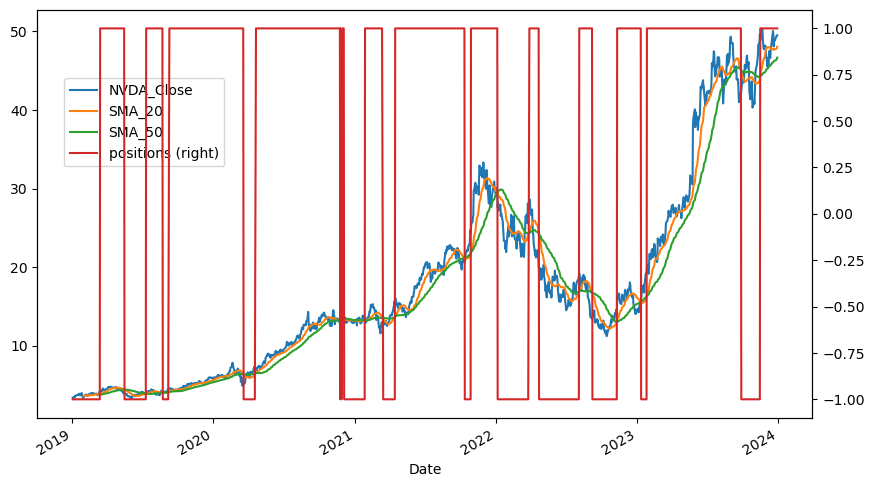

In [14]:
stock_data['positions'] = np.where(stock_data['SMA_20'] > stock_data['SMA_50'],
                                  1,
                                  -1)

ax = stock_data[['NVDA_Close','SMA_20', 'SMA_50', 'positions']].plot(figsize = (10,6), 
                                                    secondary_y = 'positions')

ax.get_legend().set_bbox_to_anchor((0.25,0.85))

# Backesting:
According to Investopedia, Backtesting is the general method for seeing how well a strategy or model would have done after the fact. It assesses the viability of a trading strategy by discovering how it would play out using historical data. If backtesting works, traders and analysts may have the confidence to employ it going forward.  From my readings, traders would use different metrics to quatify a good backtested trading strategy. 

#### From the book "Inside the Black Box: A Guide to Systematic Investing," here are some backtesting metrics used (Page 168 - 176):
1. Graph of Cumulative Profits Over Time
2. Average Rate of Return 
3. Variability of Returns Over Time
4. Max Drawdown 
5. Predictive Power (R Squared)
6. Ratios of Return Versus Risk (Sharpe, Information, Calmar Ratio)
7. Relationship with Other Strategies (Correlation Coefficient between new ideas and existing strategies) 
8. Time Decay 
9. Sensitivity to getting information in a timely matter: For how long is the forecast effect sustained in the marketplace or initiating trades on a lagged basis after they receive a trading signal 
10. Sensitivity to Specific Parameters: Researchers look for the smoothness of the goodness of outcomes with respect to parameter values or near-neighboring sets of parameters should result in fairly similar results 

In this example, I would use number 1, 3, 4 and 6.


C:\Users\jonat\AppData\Local\Temp\ipykernel_20152\3843159343.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['daily_returns'] = stock_data['NVDA_Close'].pct_change()
C:\Users\jonat\AppData\Local\Temp\ipykernel_20152\3843159343.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  stock_data['positions'] = np.where(stock_data['SMA_20'] > stock_data['SMA_50'], 1, -1)
C:\Users\jonat\AppData\Local\Temp\ipykernel_20152\3843159343.py:14: FutureWarning: Series.__getitem__ treating keys as positions is

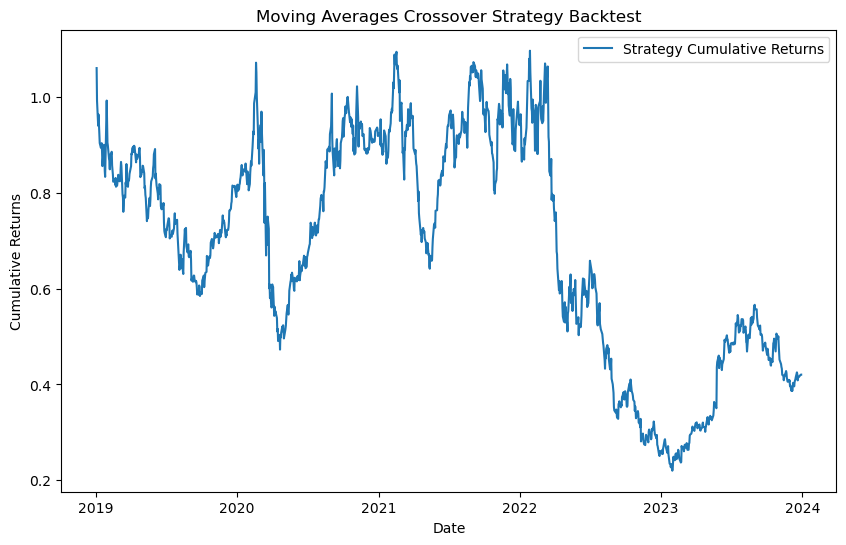

Total Return: -0.5795972659866795
Annualized Return: -0.15935343031716853
Volatility: 0.5194220116230083
Sharpe Ratio: -0.30678990637929643
Max Drawdown: 0.8769199808783118


In [15]:
# Calculate daily returns
stock_data['daily_returns'] = stock_data['NVDA_Close'].pct_change()

# Generate trading signals based on moving averages crossover
stock_data['positions'] = np.where(stock_data['SMA_20'] > stock_data['SMA_50'], 1, -1)

# Calculate strategy returns
stock_data['strategy_returns'] = stock_data['daily_returns'] * stock_data['positions'].shift(1)

# Calculate cumulative returns
stock_data['cumulative_returns'] = (1 + stock_data['strategy_returns']).cumprod()

# Evaluate performance metrics
total_return = stock_data['cumulative_returns'][-1] - 1
annualized_return = ((1 + total_return) ** (252 / len(stock_data))) - 1
volatility = stock_data['strategy_returns'].std() * np.sqrt(252)
sharpe_ratio = annualized_return / volatility
max_drawdown = stock_data['cumulative_returns'].max() - stock_data['cumulative_returns'].min()

# Visualize results
plt.figure(figsize=(10, 6))
plt.plot(stock_data['cumulative_returns'], label='Strategy Cumulative Returns')
plt.title('Moving Averages Crossover Strategy Backtest')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

print("Total Return:", total_return)
print("Annualized Return:", annualized_return)
print("Volatility:", volatility)
print("Sharpe Ratio:", sharpe_ratio)
print("Max Drawdown:", max_drawdown)


Now, let us explore another form of momentum-based trading strtaegy. We have covered a simple SMA cross-over strategy to establish buy and sell signals. 

On the technical analysis side of things, MACD is also a popular and common choice amongst retail and industrial traders. The MACD is a trend-following momentum indicator that shows the relationship between two moving averages of a security's price. It is designed to reveal changes in the strength, direction, momentum, and duration of a trend.

Here is how it works:

A Buy Signal occurs when the MACD line crosses above the signal line (bullish crossover), indicating that upward momentum is strengthening.

A Sell Signal occurs when the MACD line crosses below the signal line (bearish crossover), indicating that downward momentum is strengthening.

Zero Line Crossover indicates that when the MACD crosses above or below the zero line, it indicates a shift in the overall trend. Crossing above the zero line indicates bullish momentum, while crossing below the zero line suggests bearish momentum.


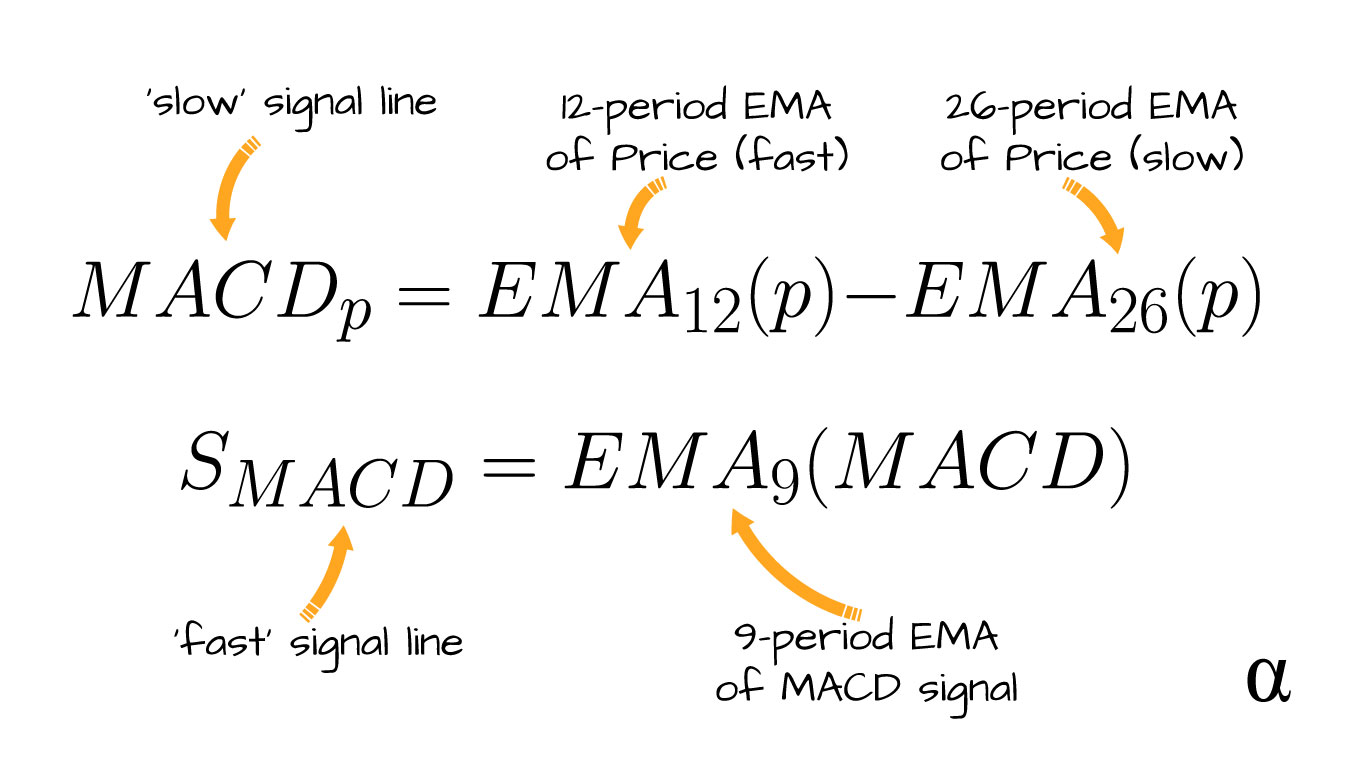

Key differences between the MACD and SMA:

The MACD uses the difference between two EMAs and includes a signal line and histogram to provide more detailed information about momentum and trend strength. The MACD gives traders both trend-following and momentum signals while the Moving Average Crossover is a more straightforward strategy using only two moving averages. It does not directly provide information about the strength of the trend, only its direction.

Furthermore, the histogram feature of the MACD adds an extra layer of detail by showing the rate of convergence or divergence between the MACD line and the signal line, making it easier to gauge the strength or weakness of a trend. On the other hand, Moving Average Crossover Lacks this feature.

In [26]:
# Define MACD trading strategy
def macd_strategy(stock_data, short_window=12, long_window=26, signal_window=9):
    # Calculate short-term and long-term exponential moving averages
    stock_data['ShortEMA'] = stock_data['NVDA_Close'].ewm(span=short_window, adjust=False).mean()
    stock_data['LongEMA'] = stock_data['NVDA_Close'].ewm(span=long_window, adjust=False).mean()

    # Calculate MACD line
    stock_data['MACD'] = stock_data['ShortEMA'] - stock_data['LongEMA']

    # Calculate signal line
    stock_data['Signal'] = stock_data['MACD'].ewm(span=signal_window, adjust=False).mean()

    # Generate trading signals
    stock_data['positions'] = np.where(stock_data['MACD'] > stock_data['Signal'], 1, -1)

    return stock_data

Backtesting the MACD Trading Strategy:

C:\Users\jonat\AppData\Local\Temp\ipykernel_20152\3368956363.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  total_return = stock_data['cumulative_returns'][-1] - 1


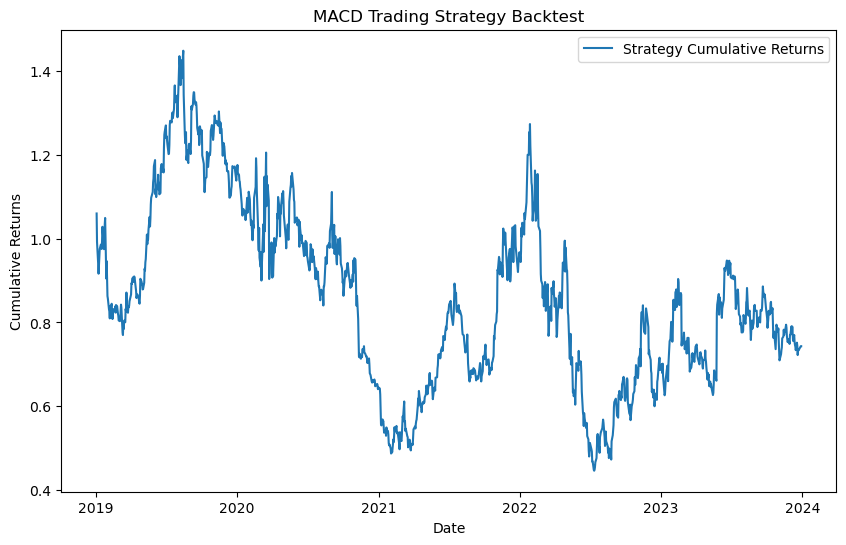

Total Return: -0.2567105962029641
Annualized Return: -0.05769689742146289
Volatility: 0.5194063355416652
Sharpe Ratio: -0.11108239055515838
Max Drawdown: 1.0036722688921127


In [27]:
# Run MACD trading strategy
stock_data = macd_strategy(stock_data)

# Calculate strategy returns
stock_data['strategy_returns'] = stock_data['NVDA_Close'].pct_change() * stock_data['positions'].shift(1)

# Calculate cumulative returns
stock_data['cumulative_returns'] = (1 + stock_data['strategy_returns']).cumprod()

# Evaluate performance metrics
total_return = stock_data['cumulative_returns'][-1] - 1
annualized_return = ((1 + total_return) ** (252 / len(stock_data))) - 1
volatility = stock_data['strategy_returns'].std() * np.sqrt(252)
sharpe_ratio = annualized_return / volatility
max_drawdown = stock_data['cumulative_returns'].max() - stock_data['cumulative_returns'].min()

# Visualize results
plt.figure(figsize=(10, 6))
plt.plot(stock_data['cumulative_returns'], label='Strategy Cumulative Returns')
plt.title('MACD Trading Strategy Backtest')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.show()

print("Total Return:", total_return)
print("Annualized Return:", annualized_return)
print("Volatility:", volatility)
print("Sharpe Ratio:", sharpe_ratio)
print("Max Drawdown:", max_drawdown)

# Mean Reversion Strategies

Mean Reversion strategies are also common amongst investors. 

One would have to first specify what is the center of gravity in which the price fluctuate, the upper and lower boundaries that are considered overbought and oversold, the point of divergence from that equilibrium that warrants a trade, ations taken if the price moves up abruptly which increases the probability that the price will reverse again due to excessive demand / supply.

Mean reversion strtagies is an area of research amongst quantitative researchers, ranging from simple methods such as bollinger bands and euclidean distance to complex methods such as cointegration and linear shrinakge. Complex models include sophisticated multi-factor residual models, such as the Ornstein-Uhlenbeck process, which states that stock prices gravitate towards a central point of attraction, akin to the origin, over time. For more information, please check out my blog post on mean-reversion strategies: https://medium.com/@johoblogs/mean-reversion-strategies-a0e54ddd5af8

In this exmample, we would be analysing the simple bollinger bands as a mean reversion strategy before backtesting it.


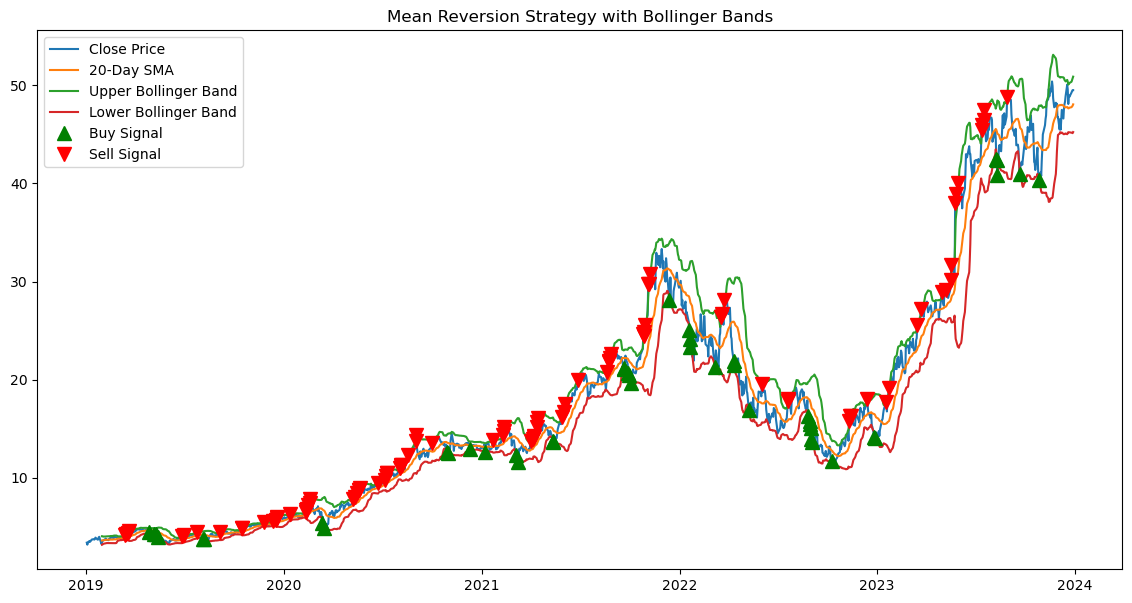

In [28]:
window = 20
stock_data['SMA'] = stock_data['NVDA_Close'].rolling(window=window).mean()
stock_data['STD'] = stock_data['NVDA_Close'].rolling(window=window).std()

# Calculate Bollinger Bands
stock_data['Upper Band'] = stock_data['SMA'] + 2 * stock_data['STD']
stock_data['Lower Band'] = stock_data['SMA'] - 2 * stock_data['STD']

# Create signals
stock_data['Signal'] = np.where(stock_data['NVDA_Close'] < stock_data['Lower Band'], 1.0, 0.0)
stock_data['Signal'] = np.where(stock_data['NVDA_Close'] > stock_data['Upper Band'], -1.0, stock_data['Signal'])

# Calculate returns
stock_data['Returns'] = stock_data['NVDA_Close'].pct_change()

# Calculate strategy returns
stock_data['Strategy Returns'] = stock_data['Signal'].shift(1) * stock_data['Returns']

# Plotting
plt.figure(figsize=(14,7))
plt.plot(stock_data['NVDA_Close'], label='Close Price')
plt.plot(stock_data['SMA'], label='20-Day SMA')
plt.plot(stock_data['Upper Band'], label='Upper Bollinger Band')
plt.plot(stock_data['Lower Band'], label='Lower Bollinger Band')

plt.plot(stock_data[stock_data['Signal'] == 1.0].index, 
         stock_data['NVDA_Close'][stock_data['Signal'] == 1.0], 
         '^', markersize=10, color='g', lw=0, label='Buy Signal')

plt.plot(stock_data[stock_data['Signal'] == -1.0].index, 
         stock_data['NVDA_Close'][stock_data['Signal'] == -1.0], 
         'v', markersize=10, color='r', lw=0, label='Sell Signal')

plt.title('Mean Reversion Strategy with Bollinger Bands')
plt.legend()
plt.show()

In [29]:
# Calculate Cumulative Returns
cumulative_returns = (stock_data['Strategy Returns'] + 1).cumprod() - 1

# Calculate Annualized Returns
annualized_returns = (1 + cumulative_returns.iloc[-1]) ** (252 / len(stock_data)) - 1

# Calculate Volatility (Standard Deviation of Returns)
volatility = stock_data['Strategy Returns'].std()

# Calculate Sharpe Ratio
risk_free_rate = 0.0  # Assuming risk-free rate of return
sharpe_ratio = (annualized_returns - risk_free_rate) / volatility

# Calculate Maximum Drawdown
rolling_max = (cumulative_returns + 1).rolling(window=len(cumulative_returns), min_periods=1).max()
drawdown = (cumulative_returns + 1) / rolling_max - 1
max_drawdown = drawdown.min()

# Print Statistics
print("Cumulative Returns: {:.2f}%".format(cumulative_returns.iloc[-1] * 100))
print("Annualized Returns: {:.2f}%".format(annualized_returns * 100))
print("Volatility: {:.2f}%".format(volatility * 100))
print("Sharpe Ratio: {:.2f}".format(sharpe_ratio))
print("Maximum Drawdown: {:.2f}%".format(max_drawdown * 100))

Cumulative Returns: 50.22%
Annualized Returns: 8.49%
Volatility: 0.97%
Sharpe Ratio: 8.78
Maximum Drawdown: -23.11%


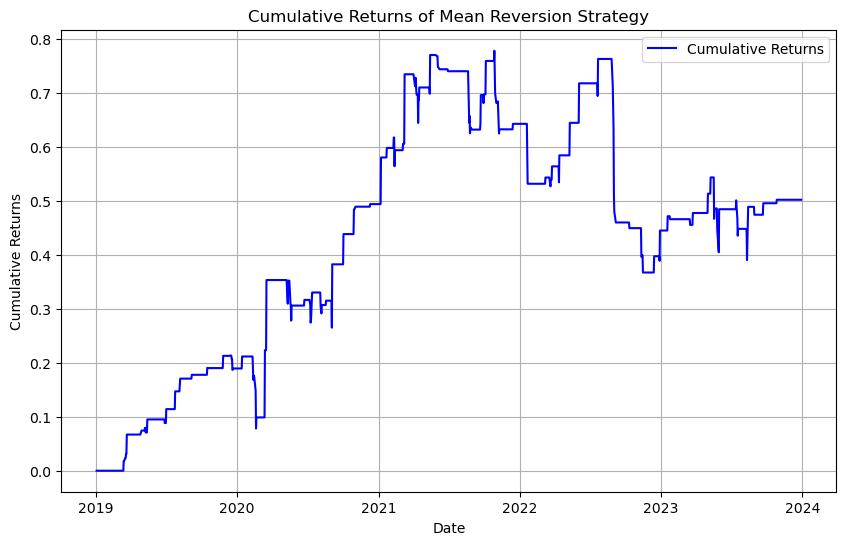

In [30]:
# Plot Cumulative Returns
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns.index, cumulative_returns, label='Cumulative Returns', color='blue')
plt.title('Cumulative Returns of Mean Reversion Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.legend()
plt.grid(True)
plt.show()

Finally, we would need a control for all the trading strategies mentioned above. Should a retail investor do all these fancy methods of entrying and exiting the market? We have not include any transaction costs in our cumulative profits! Some may posit a buy-and-hold strategy or value-investing strategy instead. 

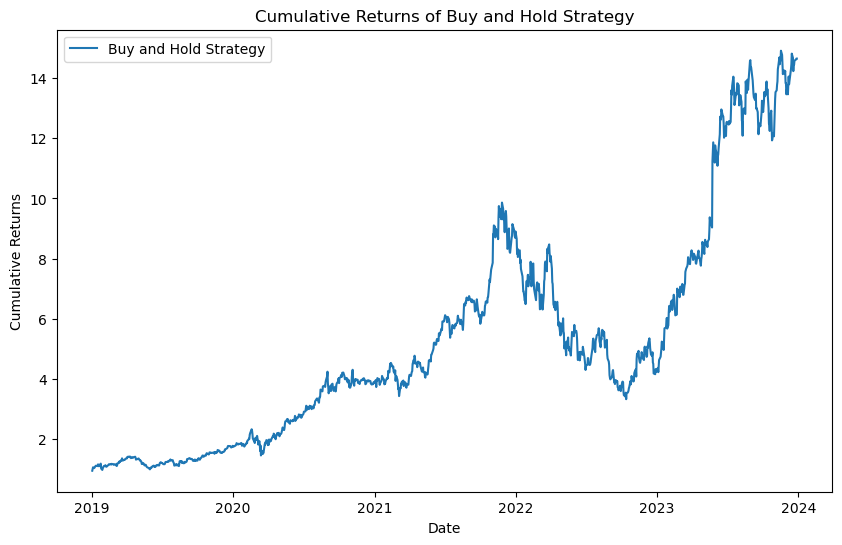

Buy and Hold Strategy Statistics:
Cumulative Returns: nan%
Annualized Returns: nan%
Volatility: 51.77%
Sharpe Ratio: nan
Maximum Drawdown: nan%


In [31]:
# Calculate the buy and hold strategy cumulative returns
stock_data['Cumulative Returns_BH'] = (1 + stock_data['NVDA_Close'].pct_change().shift(-1)).cumprod()
stock_data['NVDA_Close'] = pd.to_numeric(stock_data['NVDA_Close'], errors='coerce')

# Plot the cumulative returns for the buy and hold strategy
plt.figure(figsize=(10, 6))
plt.plot(stock_data['Cumulative Returns_BH'], label='Buy and Hold Strategy')
plt.legend()
plt.title('Cumulative Returns of Buy and Hold Strategy')
plt.xlabel('Date')
plt.ylabel('Cumulative Returns')
plt.show()

# Calculate cumulative returns
cumulative_returns_bh = stock_data['Cumulative Returns_BH'].iloc[-1]
# Calculate annualized returns
start_date_bh = stock_data.index[0]
end_date_bh = stock_data.index[-1]
days_bh = (end_date_bh - start_date_bh).days
years_bh = days_bh / 365
annualized_returns_bh = (cumulative_returns_bh ** (1 / years_bh)) - 1
# Calculate volatility
volatility_bh = stock_data['NVDA_Close'].pct_change().std() * np.sqrt(252)
# Calculate Sharpe ratio
sharpe_ratio_bh = annualized_returns_bh / volatility_bh
# Calculate maximum drawdown
cumulative_returns_bh_values = stock_data['Cumulative Returns_BH'].values
previous_peaks_bh = np.maximum.accumulate(cumulative_returns_bh_values)
drawdown_bh = (cumulative_returns_bh_values - previous_peaks_bh) / previous_peaks_bh
max_drawdown_bh = np.min(drawdown_bh)


# Print Statistics
print("Buy and Hold Strategy Statistics:")
print("Cumulative Returns: {:.2f}%".format(cumulative_returns_bh * 100))
print("Annualized Returns: {:.2f}%".format(annualized_returns_bh * 100))
print("Volatility: {:.2f}%".format(volatility_bh * 100))
print("Sharpe Ratio: {:.2f}".format(sharpe_ratio_bh))
print("Maximum Drawdown: {:.2f}%".format(max_drawdown_bh * 100))